# Model walkoff
This notebook contains sample code for using an EDSL survey to prompt a set of language models to generate some content, and then evaluate the content.

Please see our [documentation page](https://docs.expectedparrot.com/en/latest/index.html) for tips and tutorials on getting started using EDSL to simulate surveys and experiments with large language models.

In [1]:
from edsl.questions import QuestionFreeText, QuestionLinearScale
from edsl import Scenario, Model

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [3]:
# See a current list of available models:
# Model.available()

In [4]:
def model_vote(models, topic):

    question_text = "Draft a sentence summarizing the most important things to know about {{ topic }}."

    q_content = QuestionFreeText(question_name="content", question_text=question_text)

    scenario = Scenario({"topic": topic})

    results_content = q_content.by(scenario).by(models).run()
    df_content = results_content.to_pandas(remove_prefix=True)

    content_dict = dict(zip(df_content["model"], df_content["content"]))
    content_dict

    q_score = QuestionLinearScale(
        question_name="score",
        question_text="Consider the following response to the question: "
        + question_text
        + "Response: {{ content }} "
        + "Score this response in terms of accuracy and completeness.",
        question_options=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        option_labels={0: "Terrible", 10: "Amazing"},
    )

    scenarios = [
        Scenario({"drafting_model": m, "content": c}) for m, c in content_dict.items()
    ]

    results_scores = q_score.by(scenarios).by(models).run()

    df_scores = results_scores.to_pandas(remove_prefix=True)
    df_scores = df_scores[["model", "drafting_model", "content", "score"]]

    heatmap_data = df_scores.pivot_table(
        index="model", columns="drafting_model", values="score", aggfunc="mean"
    )

    plt.figure(figsize=(10, 8))
    sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="viridis", linewidths=0.5)
    plt.title(topic.upper() + ": Which model knows best?")
    plt.xlabel("Content Generating Model")
    plt.ylabel("Scoring Model")
    plt.show()

In [5]:
models = [
    Model(m)
    for m in (
        "gpt-3.5-turbo",
        "gpt-4o",
        "gemini-pro",
        "claude-3-haiku-20240307",
        "claude-3-sonnet-20240229",
    )
]

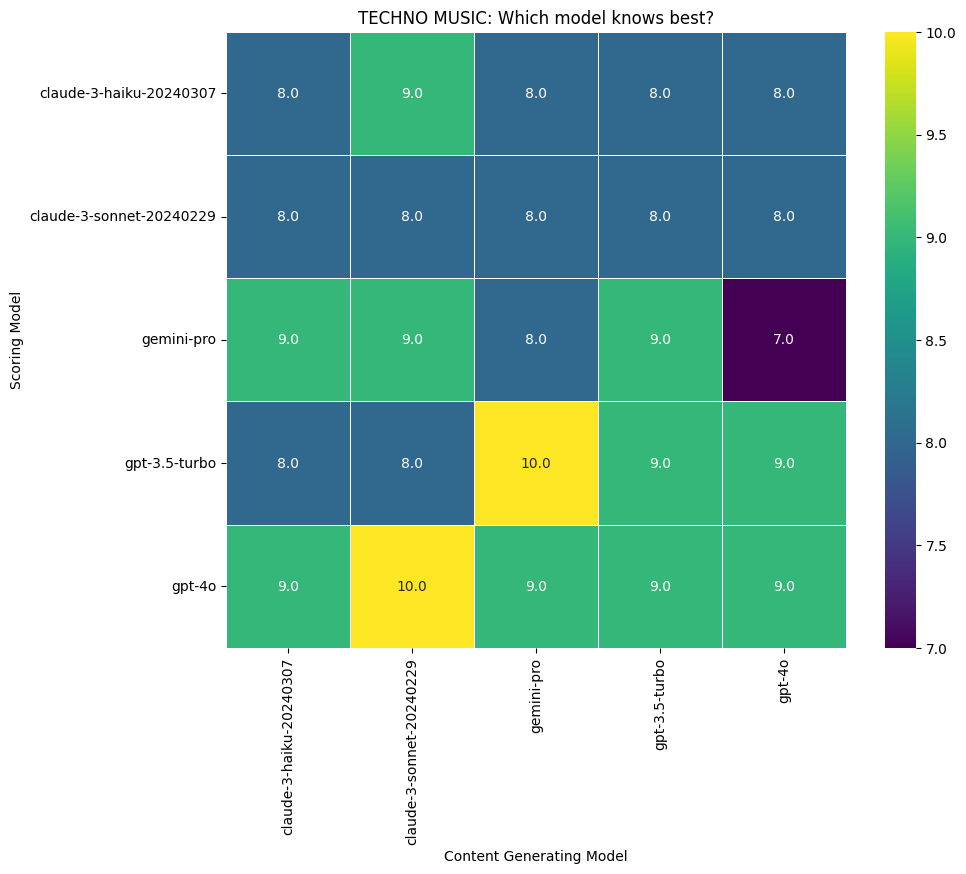

In [6]:
model_vote(models, topic="techno music")

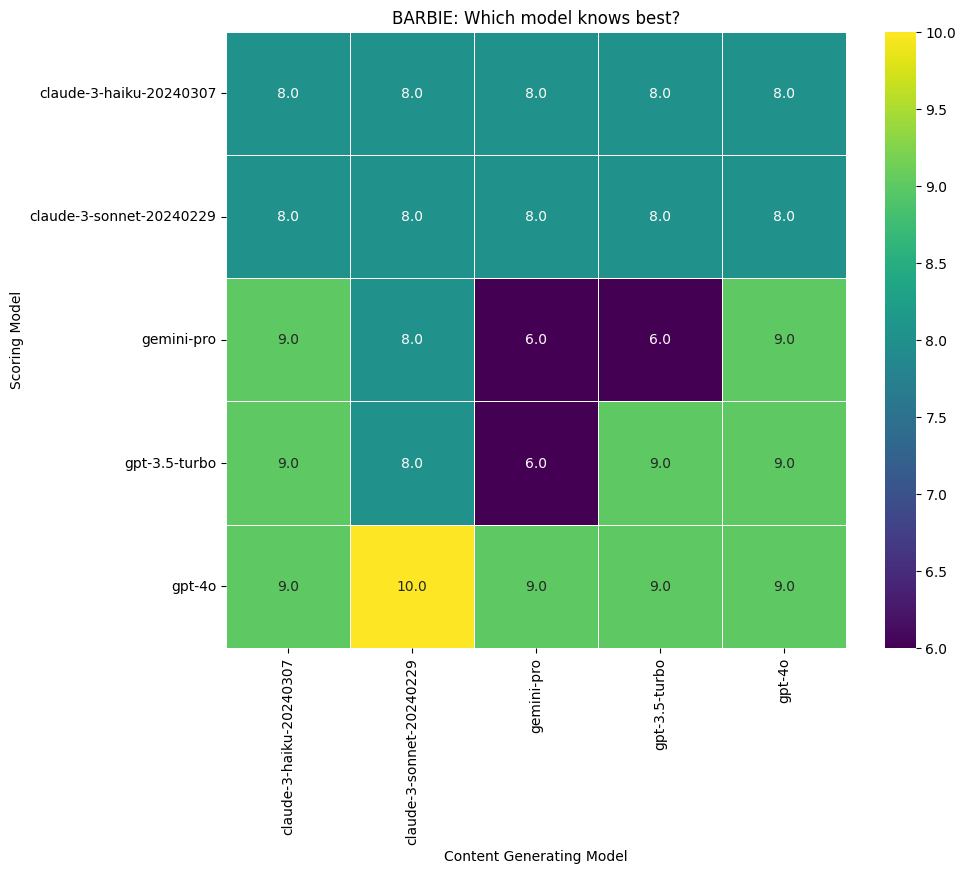

In [7]:
model_vote(models, topic="Barbie")

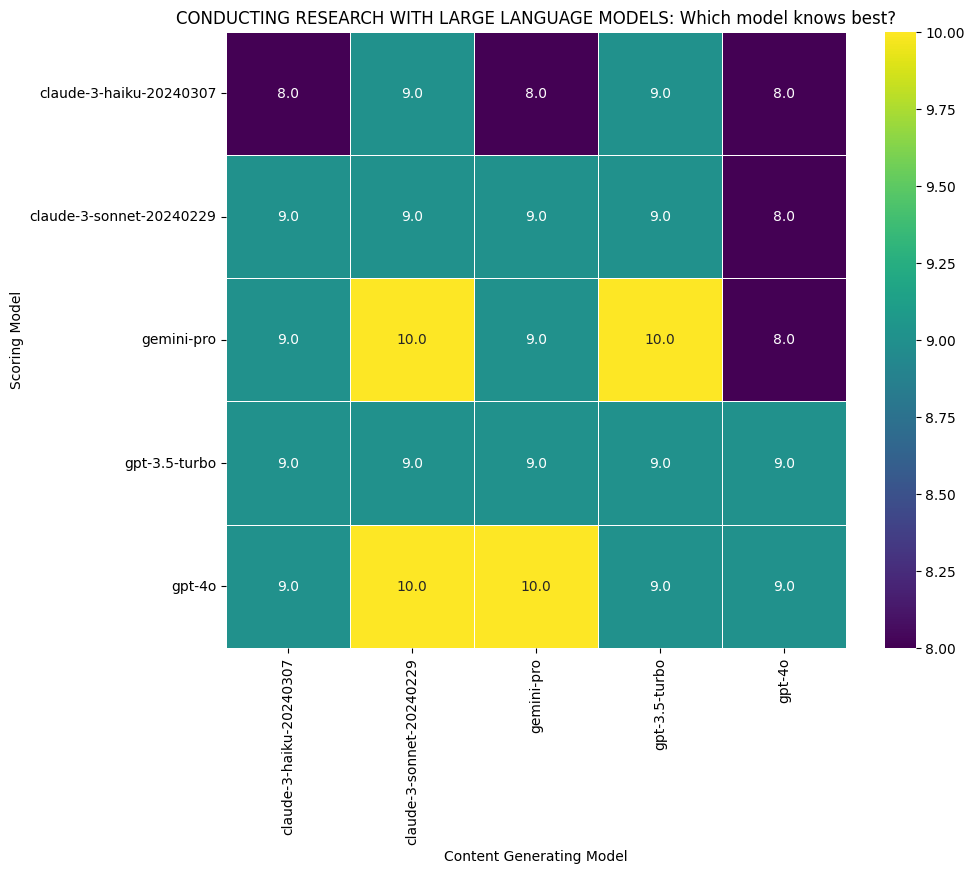

In [8]:
model_vote(models, topic="conducting research with large language models")